In [14]:
%pip install -r requirements.txt;

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt;'


##  Importing libraries

In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the data

In [16]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
data.shape

(569, 33)

In [18]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [19]:
data.duplicated().sum()

0

## Data Preprocessing

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [22]:
data.drop("Unnamed: 32", axis=1, inplace = True)
data.drop("id", axis=1, inplace = True)

## Exploratory Data Analysis (EDA)

In [23]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
corr=data.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Histogram

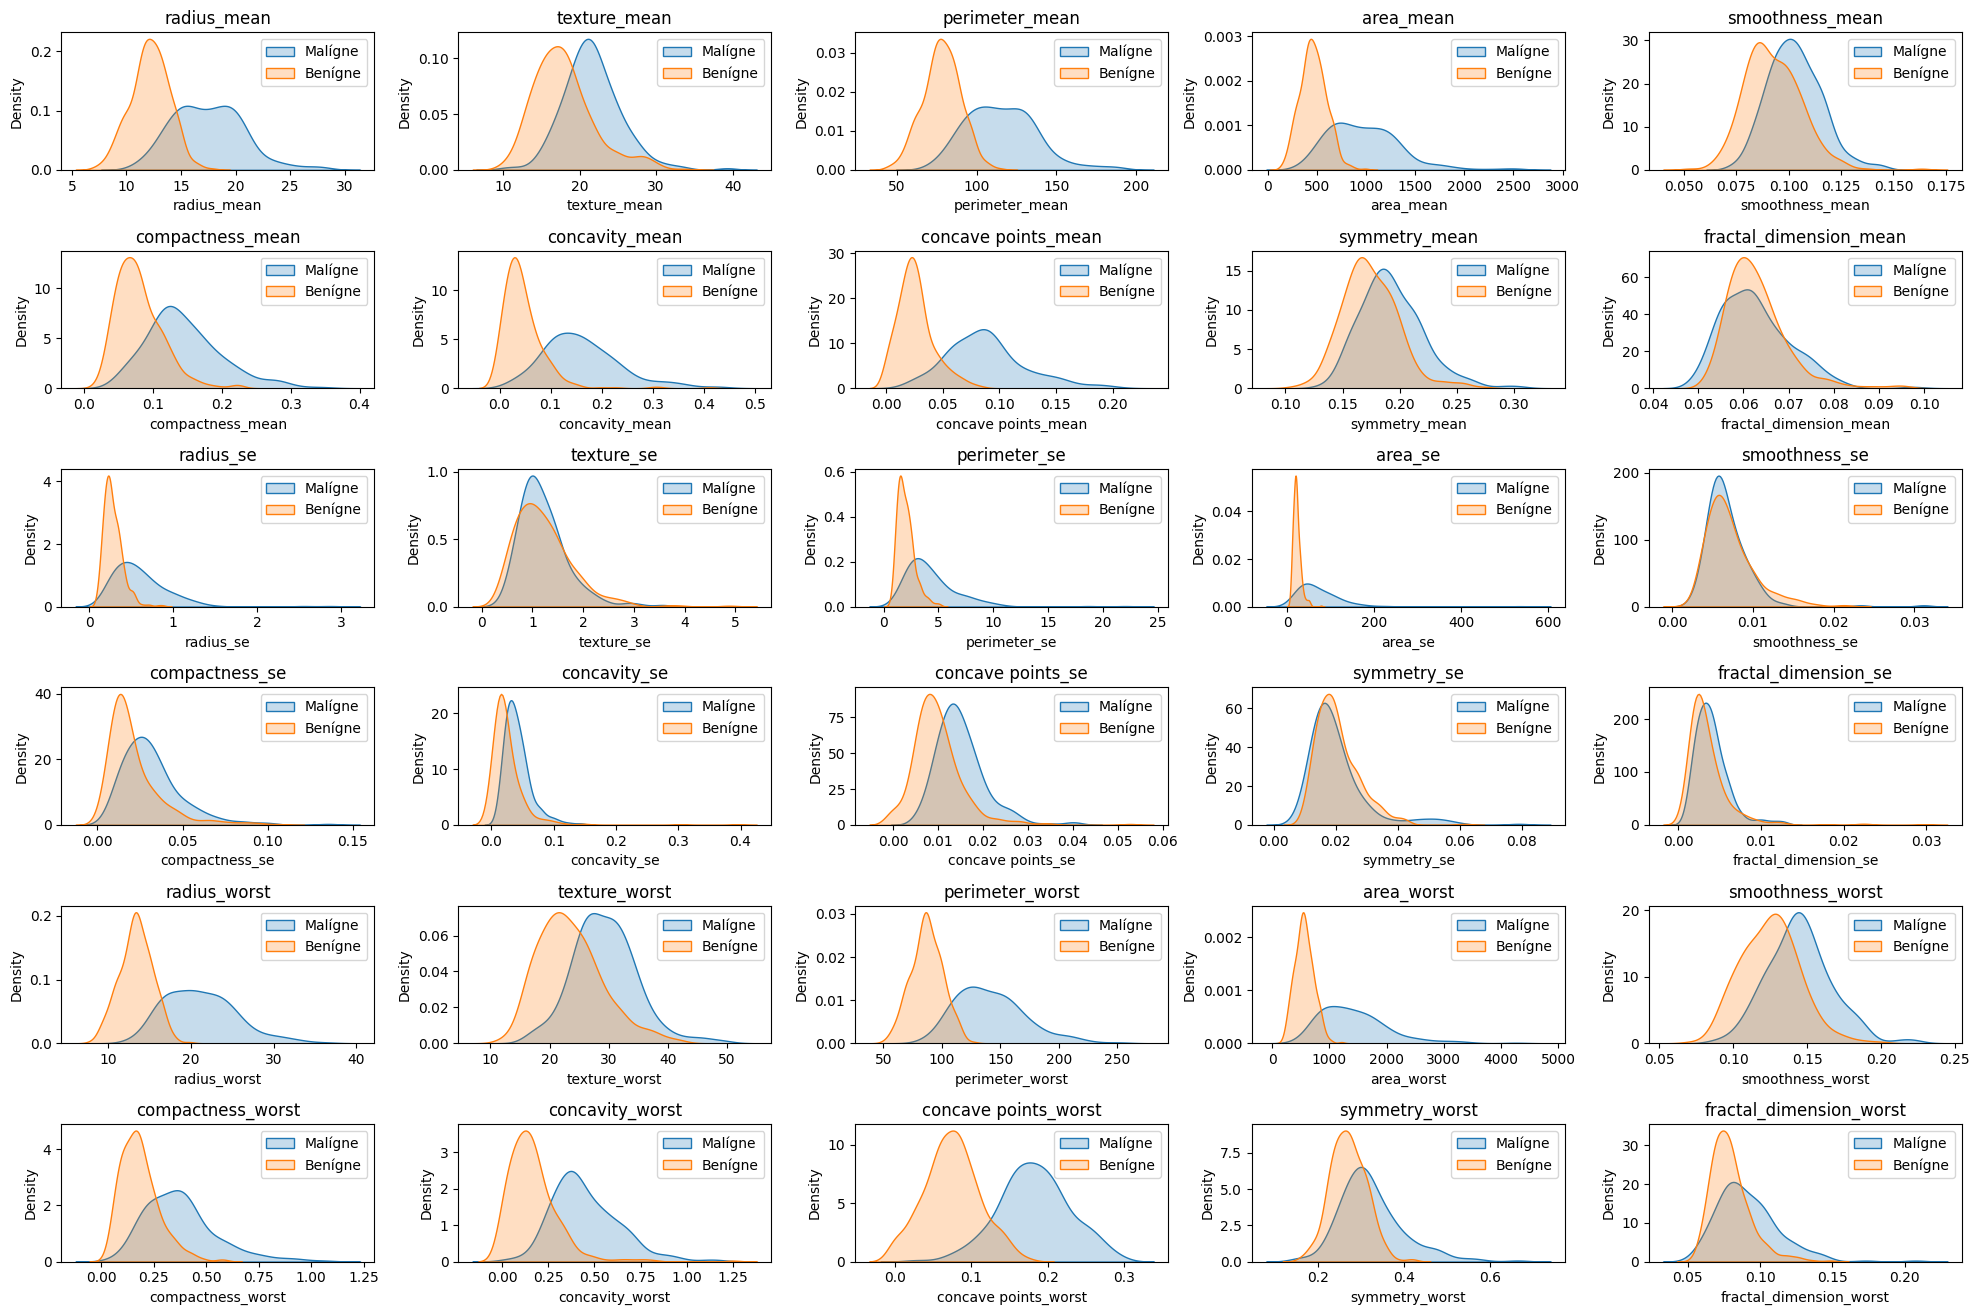

In [25]:
columns_to_plot = data.columns.drop("diagnosis")

plt.figure(figsize=(20, 15))
plotnumber = 1
num_columns = 5  

for column in columns_to_plot:
    plt.subplot(len(columns_to_plot) // num_columns + 1, num_columns, plotnumber)
    sns.kdeplot(data[data['diagnosis'] == 1][column], label='Malígne', fill=True)
    sns.kdeplot(data[data['diagnosis'] == 0][column], label='Benígne', fill=True)
    plt.title(f'{column}')
    plt.legend()
    plotnumber += 1

plt.tight_layout() 
plt.show()


Graf zobrazuje hustotu rozdelenia hodnôt pre malígne nádory (M) - modrá línia a pre benígne nádory (B) - oranžovaná línia

* vo väčšine je zrejmý rozdiel medzi M a B nádormi:
** M sú väčšie (radius_mean, perimeter_mean, area_mean)
** M majú nepravidelné tvary (compactness_mean, concavity_mean, concave points_mean)
** M majú zložitý povrch (vyšší fractal_dimension_mean)

Heatmap

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

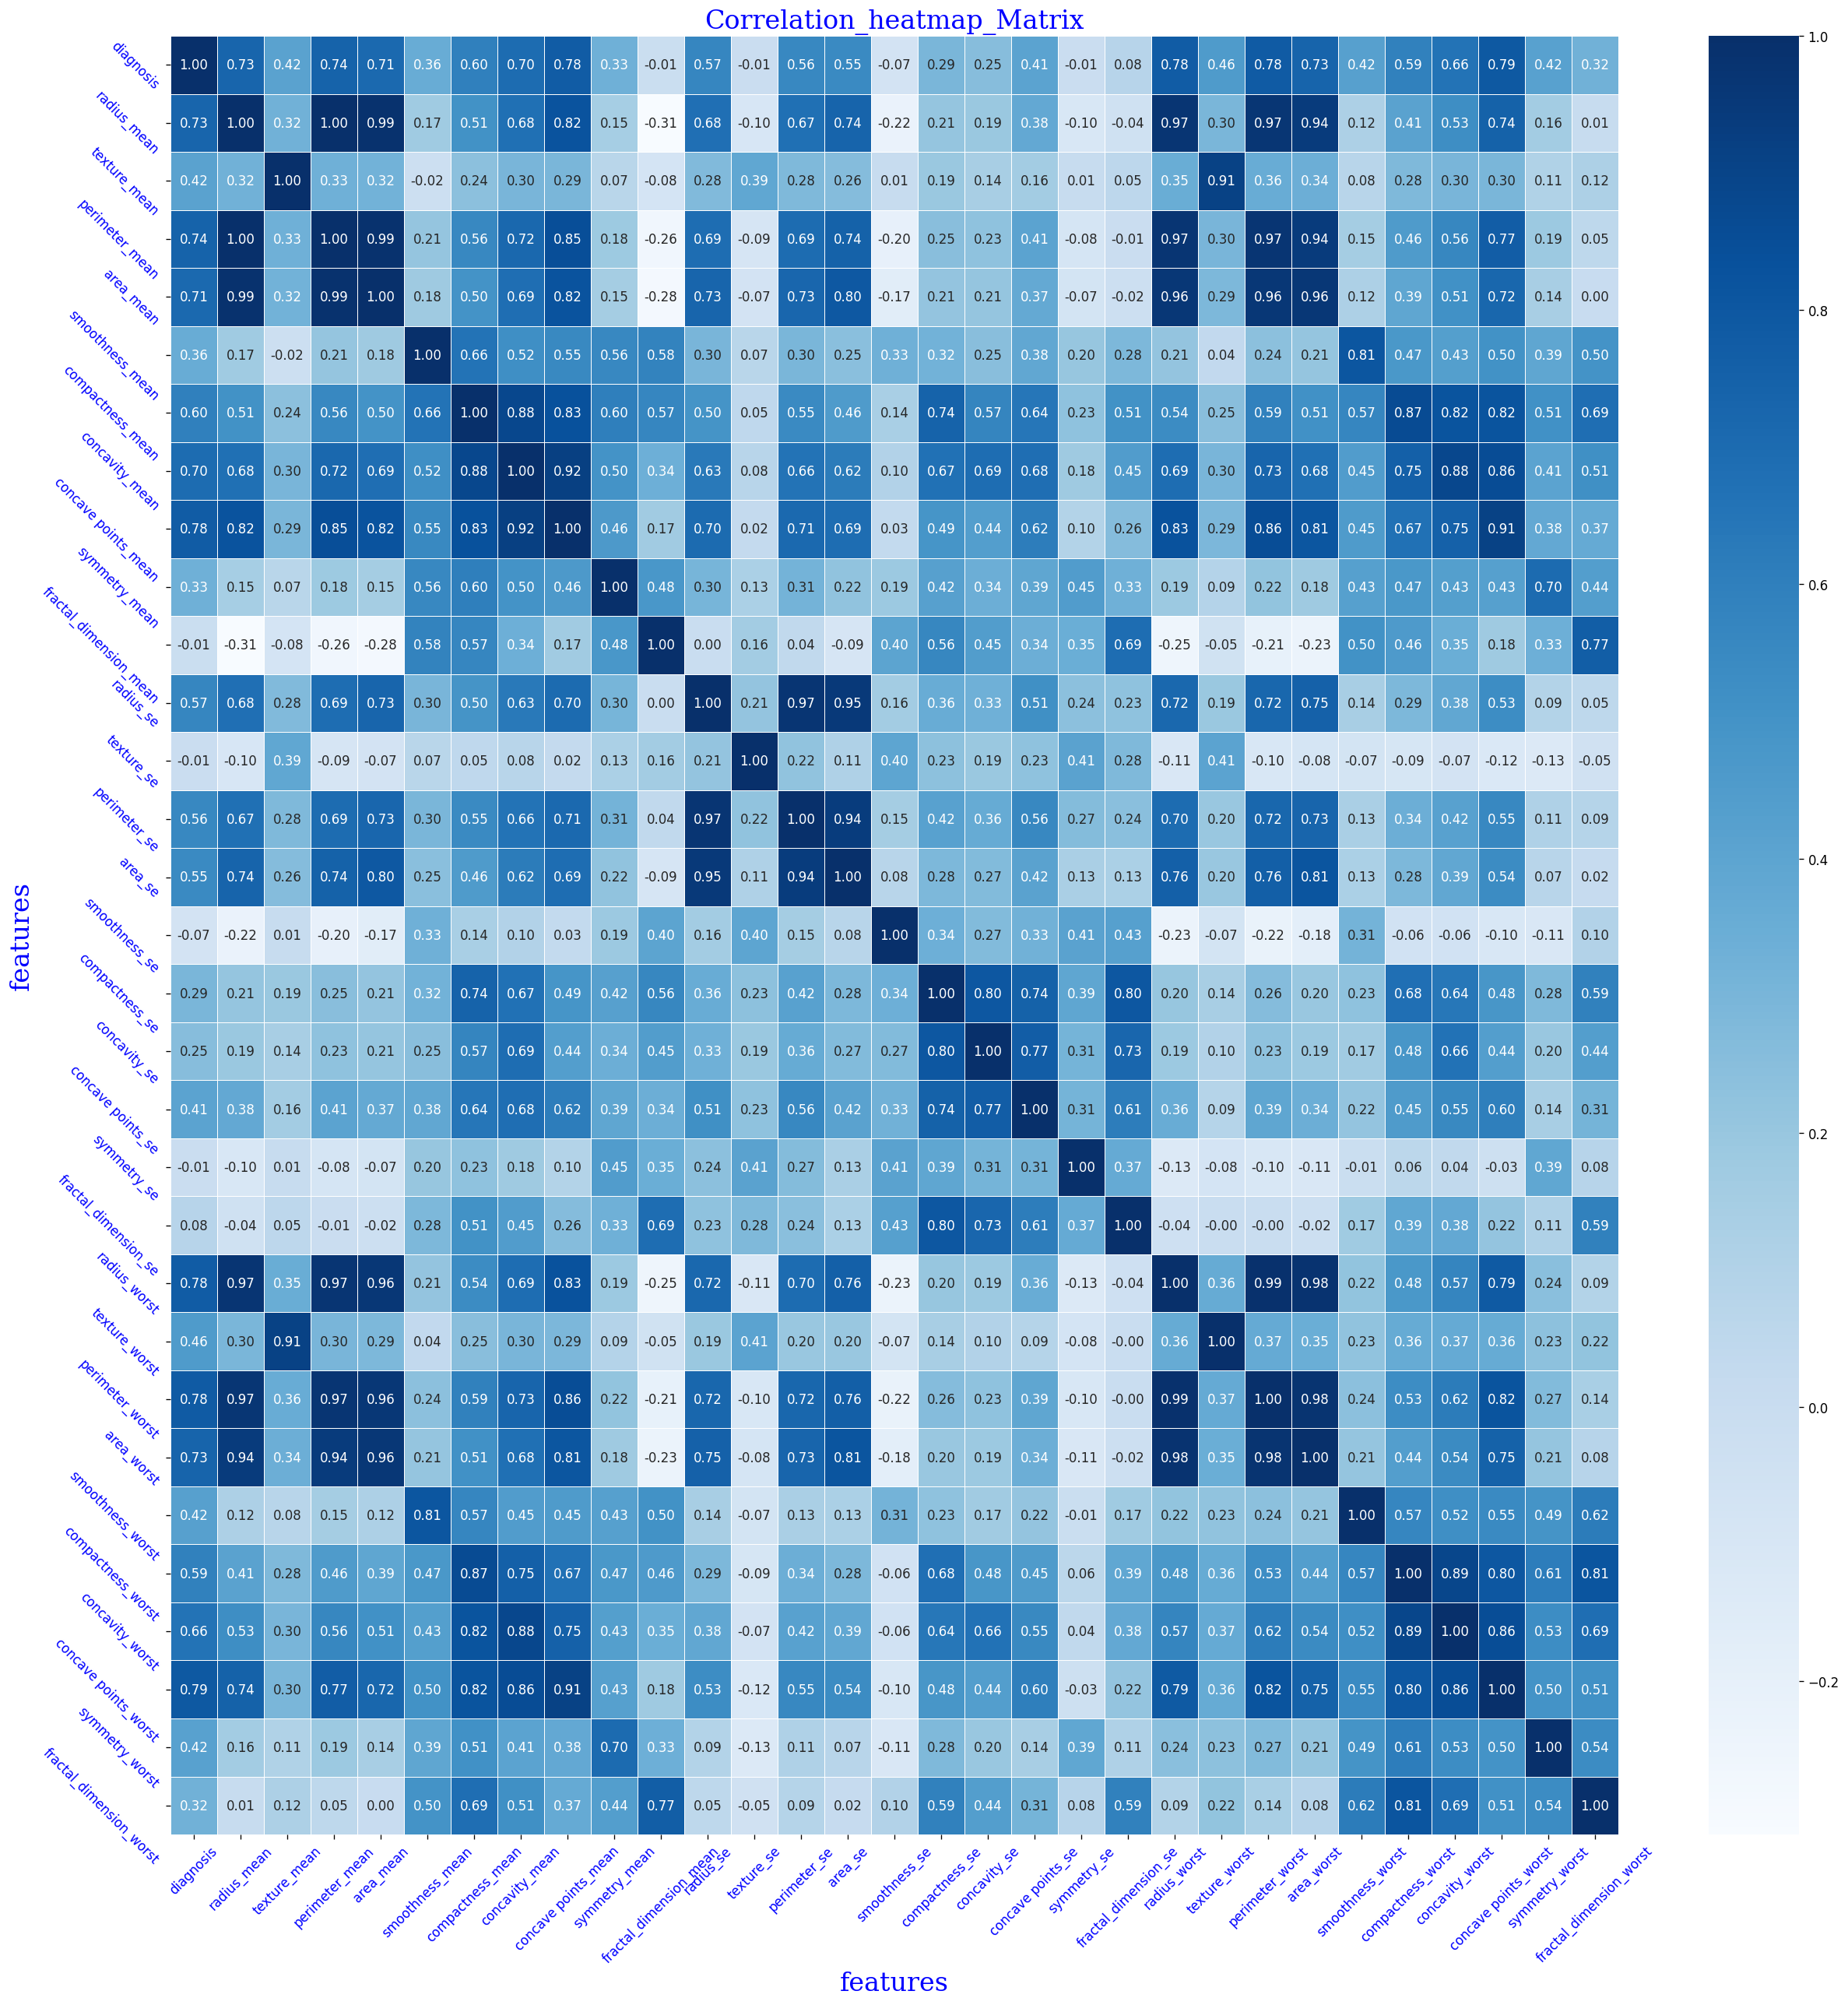

In [26]:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='Blues',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)

* Pomocou Heatmapa korealčnej matice identifikuje vzťahy medzi atribútami.

* V ďalšom kroku odstránime atribúty (stĺpce) s vysokou vzájomnou koreláciou, pretože takéto premenné poskytujú nadbytočné (redundantné) informácie. 

In [27]:
corr_matrix = data.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

data_reduced = data.drop(to_drop, axis=1)
print(f"Zredukovaný dataset má {data_reduced.shape[1]} stĺpcov.")
print(f"Odstránené stĺpce: {to_drop}")

Zredukovaný dataset má 23 stĺpcov.
Odstránené stĺpce: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst']


* zredukovaný dataset odsahuje 23 stĺpov

## Modelovanie

# Unsupervised Learning

1. Pricnipal Component analysis

c:\Users\lenov\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lenov\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


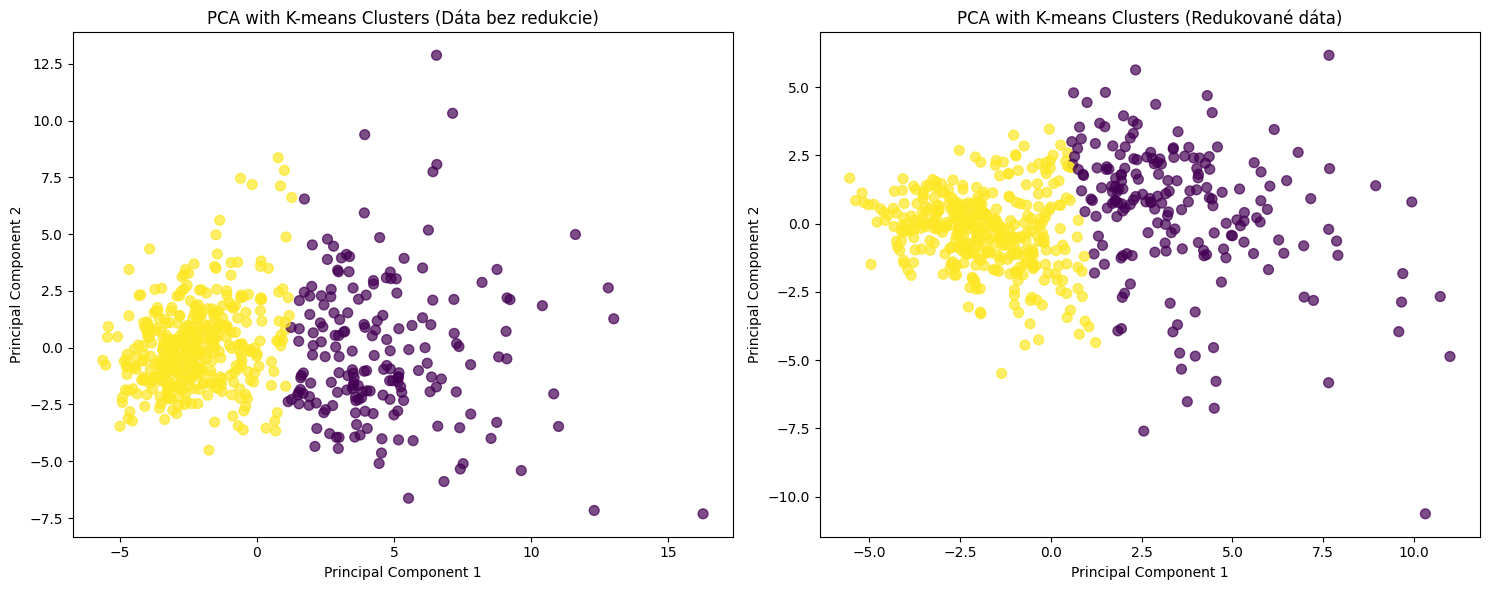

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled1 = scaler.fit_transform(data_reduced)
data_scaled2 = scaler.fit_transform(data)

pca = PCA(n_components=2) 
data_pca1 = pca.fit_transform(data_scaled1)
data_pca2 = pca.fit_transform(data_scaled2)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters1 = kmeans.fit_predict(data_pca1)
clusters2 = kmeans.fit_predict(data_pca2)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(data_pca2[:, 0], data_pca2[:, 1], c=clusters2, cmap='viridis', s=50, alpha=0.7)
axes[0].set_title('PCA with K-means Clusters (Dáta bez redukcie)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

axes[1].scatter(data_pca1[:, 0], data_pca1[:, 1], c=clusters1, cmap='viridis', s=50, alpha=0.7)
axes[1].set_title('PCA with K-means Clusters (Redukované dáta)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


* Výsledky PCA (Principal Component Analysis) a K-means clusteringu na:
    Pôvodných dáta (bez redukcie).
    Redukovaných dátach (odstránené atribúty s vysokou vzájomnou koreláciou).

* Graf č.1, pôvodné dáta : Jmedzi zhlukmi existuje určitá separácia, ale aj určitý prekryv, čo znamená, že niektoré vzorky môžu byť nejednoznačné, pokiaľ ide o ich pridelenie do zhlukov.
* Graf č.2, redukované dáta: separácia medzi dvoma zhlukmi je stále prítomná, ale zhluky sú o niečo kompaktnejšie, čo naznačuje lepšiu klasifikovateľnosť po odstránení redundantných informácií.

## Dimenzionální redukce a kontrola významu features

PCA (vizualizační) model
PCA na dataset při zachování 99,6 % variability

Metodou na snížení počtu dimenzí mnohorozměrných dat můžeme ušetřit features, ale zejména nám to řekne, jestli se všechny podílí významně na výsledku.

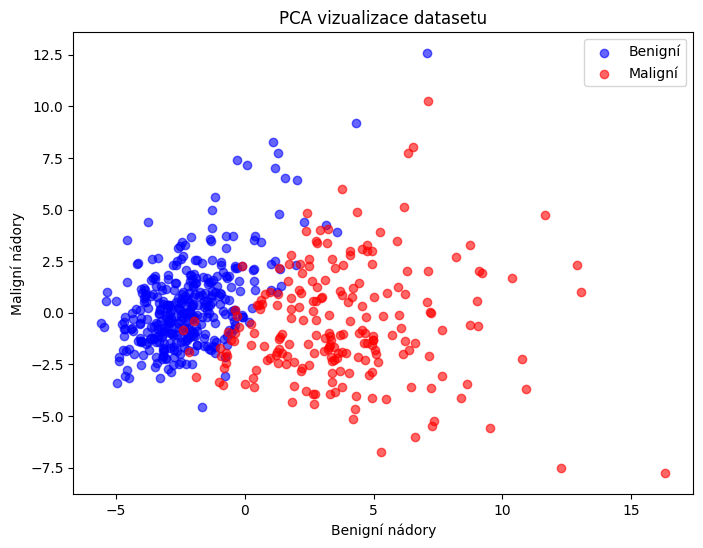

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the dataset to 2 components for visualization (2 komponenty protože - Benigní/maligní)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graf s 2 hodnotami
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Benigní', alpha=0.6, c='b')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Maligní', alpha=0.6, c='r')
plt.title('PCA vizualizace datasetu')
plt.xlabel('Benigní nádory')
plt.ylabel('Maligní nádory')
plt.legend()
plt.show()

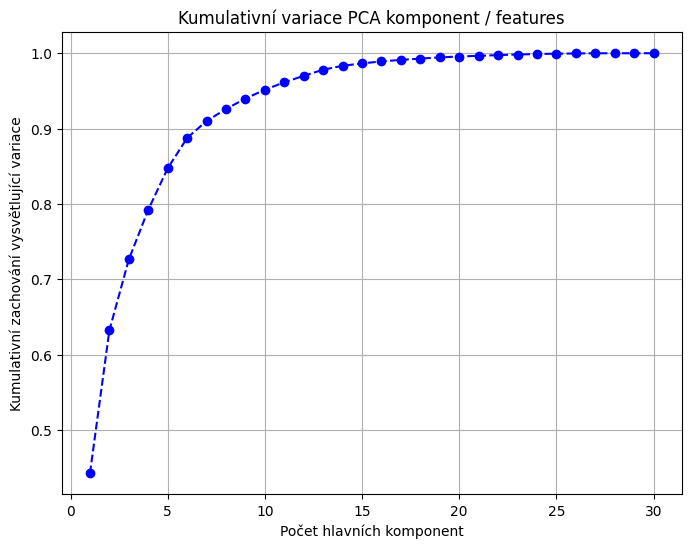

In [40]:
# Trénování PCA na datasetu pro výsledek variance - kolik featur rozhoduje?
pca = PCA().fit(X_scaled)

# Kalkulace kumulativní variace
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Kumulativní variace PCA komponent / features')
plt.xlabel('Počet hlavních komponent')
plt.ylabel('Kumulativní zachování vysvětlující variace')
plt.grid(True)
plt.show()

In [41]:
# Kumulativní variace
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Počet komponent, který zachová alespoň 99,5% variace
num_components = np.argmax(cumulative_variance >= 0.995) + 1

print(f"Počet komponent, které vysvětlí alespoň 99,5 % variance: {num_components}")

Počet komponent, které vysvětlí alespoň 99,5 % variance: 20


In [42]:
# Nastavení PCA tak, aby zachovalo 99,5 % variance
pca = PCA(n_components=0.995)

# Aplikace PCA na škálovaná data
X_pca = pca.fit_transform(X_scaled)

# Zobrazení výsledku
print(f"Počet komponent, které zachovávají 99,5 % variance: {pca.n_components_}")
print(f"Tvar původního datasetu: {X_scaled.shape}")
print(f"Tvar datasetu po aplikaci PCA: {X_pca.shape}")

Počet komponent, které zachovávají 99,5 % variance: 20
Tvar původního datasetu: (569, 30)
Tvar datasetu po aplikaci PCA: (569, 20)


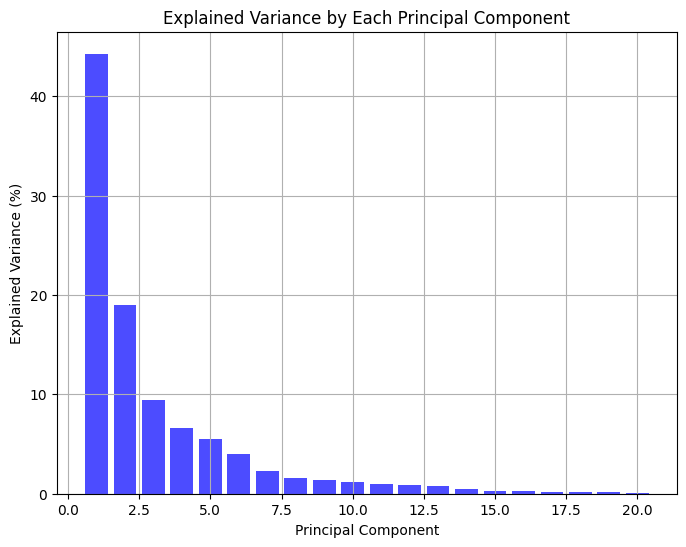

Komponenta vysvětluje 1: 44.27% z variance
Komponenta vysvětluje 2: 18.97% z variance
Komponenta vysvětluje 3: 9.39% z variance
Komponenta vysvětluje 4: 6.60% z variance
Komponenta vysvětluje 5: 5.50% z variance
Komponenta vysvětluje 6: 4.02% z variance
Komponenta vysvětluje 7: 2.25% z variance
Komponenta vysvětluje 8: 1.59% z variance
Komponenta vysvětluje 9: 1.39% z variance
Komponenta vysvětluje 10: 1.17% z variance
Komponenta vysvětluje 11: 0.98% z variance
Komponenta vysvětluje 12: 0.87% z variance
Komponenta vysvětluje 13: 0.80% z variance
Komponenta vysvětluje 14: 0.52% z variance
Komponenta vysvětluje 15: 0.31% z variance
Komponenta vysvětluje 16: 0.27% z variance
Komponenta vysvětluje 17: 0.20% z variance
Komponenta vysvětluje 18: 0.18% z variance
Komponenta vysvětluje 19: 0.16% z variance
Komponenta vysvětluje 20: 0.10% z variance


In [43]:
# Toto je optional - nemusí to tam být, protože graf výše vše více vysvětluje

# Vysvětlená variance pro každou komponentu
explained_variance_ratio = pca.explained_variance_ratio_

# Vytvoříme graf vysvětlené variance pro každou komponentu
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, color='b')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.grid(True)
plt.show()

# Vytiskneme vysvětlenou varianci pro každou komponentu
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Komponenta vysvětluje {i}: {var * 100:.2f}% z variance")

## Supervised Learning

Začnu běžnou logistickou regresí, protože je to vhodná metoda, která využívá dichotomie závislé proměnné - u nás tedy rozdělení na Maligní a Benigní nádor. Tímto pouze natrénuji model abych viděl, zda je podobnost

In [29]:
#Importy základních nástrojů
#preprocessing pro TEST train split klasický
from sklearn.model_selection import train_test_split

#Rozdělím si dataset na Y (Diagnóza pro train) a X (featury)
X = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

#Klasická stavba modelu při rozdělení na TRAIN a test - základní rozdělení
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

#Jak to vypadá
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [30]:
#Data potřebujeme anebo nepotřebujeme naškálovat a standardizovat

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#Začnu logistickou regresí
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistická regrese model
model = LogisticRegression(max_iter=10000)

#Trénování modelu
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
# Predikce
y_pred = model.predict(X_test)

# Jaká je přesnost modelu
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(accuracy)
print(classification_report_str)

0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



MODEL Logistické regrese je vcelku dobrý, když máme trénovací dataset. Je zde velké riziko overfittingu.

# Decision Tree


Presnosť modelu rozhodovacieho stromu: 0.9298


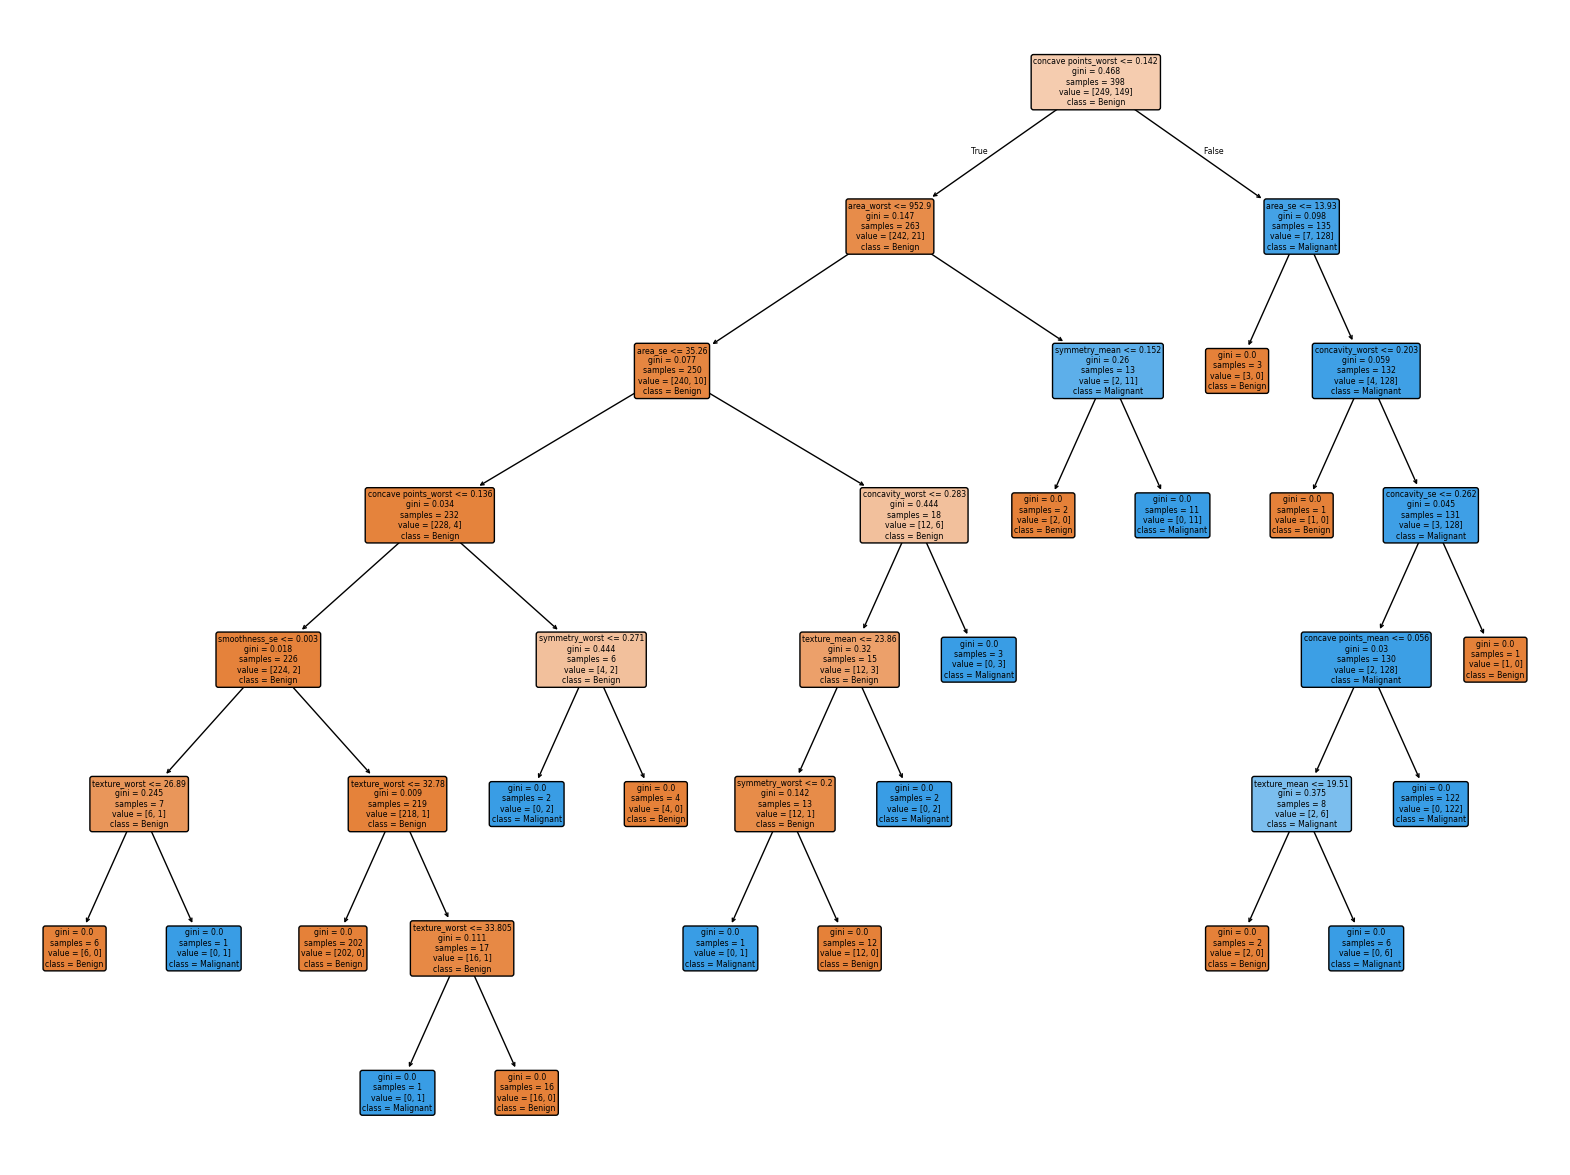

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = data_reduced.drop('diagnosis', axis=1)  
y = data_reduced['diagnosis'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

decision_tree = DecisionTreeClassifier(random_state=42,
                                       max_depth=10,  
                                       min_samples_split=2,  
                                       min_samples_leaf=1)  
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Presnosť modelu rozhodovacieho stromu: {accuracy:.4f}')

plt.figure(figsize=(20, 15))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.show()

* Silné stránky modelu: Tento model rozhodovacieho stromu dosiahol vysokú presnosť, čo naznačuje, že je schopný správne klasifikovať väčšinu nádorových vzoriek. Použitím detailného delenia a viacerých rozhodovacích úrovní dokáže dobre zachytiť vzťahy medzi atribútmi.
* Možné slabé stránky: Aj keď model dosiahol vysokú presnosť, komplexné modely ako tento môžu byť náchylné na overfitting (prispôsobenie špecifickým detailom v tréningových dátach), čo by mohlo znížiť schopnosť modelu generalizovať na nové, neznáme dáta.

# Clustering - K-means

Clustering

K-means - budu hledat shluky maligních a benigních nádorů - tedy rozdělení na dvě skupiny
Silueta

In [34]:
zaloha_dat = data

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Oddělení Featury od targetu
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [36]:
#Standardizace dat features
X_scaled = StandardScaler().fit_transform(X)

# Hledáme dva clustery
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Compare the clusters with the actual diagnosis using a confusion matrix
conf_matrix = confusion_matrix(y, cluster_labels)
conf_matrix

array([[ 13, 344],
       [175,  37]], dtype=int64)

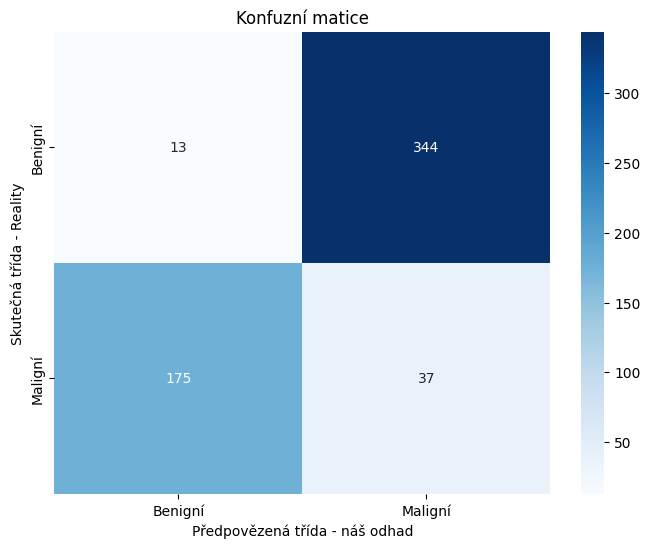

In [37]:
# Zobrazím si to v Confusion matici

conf_matrix = confusion_matrix(y, cluster_labels)
class_names = ['Benigní', 'Maligní']

# Vytvoření heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Konfuzní matice')
plt.ylabel('Skutečná třída - Reality')
plt.xlabel('Předpovězená třída - náš odhad')

plt.show()

TOTÁLNĚ Špatně - podle konfusion matrixu jsme odhadem zcela špatně - falešná negativita je extrémní, což pro náš problém není dobře.  - výrazně opačně. Musíme se proto podívat na to jinou optikou

# Detekce anomálií SVM

SVM - Vyberu hranice dat a pokračuji s klasifikací benigních a maligních dat.

I když je SVM lepší pro vícedimenzionální data, model je odolnější vůči přetrénování. 

Mohu využít více jader: Linear Kernel pro lineárně oddělitelné problémy a RBF Kernel a Poly Kernel pro složitější, nelineární klasifikační úlohy.

Model vykazuje výborné výsledky v BINÁRNÍ KLASIFIKACI

In [44]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Iniciace SVM model (defaultni nastavení)
svm_model = SVC(kernel='linear', random_state=42)

# Trénink SVM modelu
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [45]:
# Defaultní nastavení SVM modelu - jaké mám aktuální nastavení
SVC.get_params(svm_model)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
# Predikce na testovacích datech
y_pred_svm = svm_model.predict(X_test)

# Přesnost modelu a report
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
# Výsledek
print(f"Přesnost: {accuracy_svm}")
print(f"Classification Report:\n{classification_report_svm}")

Přesnost: 0.972027972027972
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Běžné nastavení SVM vychází s přesností 95,6 % - proto pokračujeme s nalezením lepších parametrů

## OPTIMALIZACE HYPERPARAMETRŮ POMOCÍ GridSearch - SVM
- použiji Gridsearch pro hyperparametr tuning
- hledáme nejlepší nastavení s cyklem několika proměnných
- Pro naše účely se zaměříme zejména na parametry C, kernal a gamma

In [47]:
from sklearn.model_selection import GridSearchCV

# Standardizování featur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rozdělení dat - budu experimentovat s různými hodnotami
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Nastavuji parametry SVM - různé hodnoty
param_grid = {
    'C': [0.1, 0.5, 0.8, 1, 10, 50, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.05, 0.1, 0.3, 0,5, 1]
}

In [48]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=10, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.8, 1, 10, 50, 100],
                         'gamma': ['scale', 'auto', 0.05, 0.1, 0.3, 0, 5, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [49]:
# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best hyperparameters:", best_params)

# Make predictions on the test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [50]:
# Evaluate the model's accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [51]:
print(f"Kompletní nastavení modelu: {SVC.get_params(grid_search.best_estimator_)}")

Kompletní nastavení modelu: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Kontrola overfittingu

In [52]:
# Výsledky na tréninkových datech
train_accuracy = grid_search.score(X_train, y_train)
print(f"Train accuracy: {train_accuracy}")

# Výsledky na testovacích datech
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Zkontroluj rozdíl mezi train a test
if train_accuracy - test_accuracy > 0.05:
    print("Model pravděpodobně overfituje!")

Train accuracy: 0.9824175824175824
Test accuracy: 0.9824561403508771


Křížová validace

In [53]:
from sklearn.model_selection import cross_val_score

# Použití křížové validace na konečném modelu
cross_val_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print(f"Křížově validované skóre: {cross_val_scores}")
print(f"Průměrné křížově validované skóre: {cross_val_scores.mean()}")

Křížově validované skóre: [0.93859649 0.94736842 0.98245614 0.92105263 0.95575221]
Průměrné křížově validované skóre: 0.9490451793199813


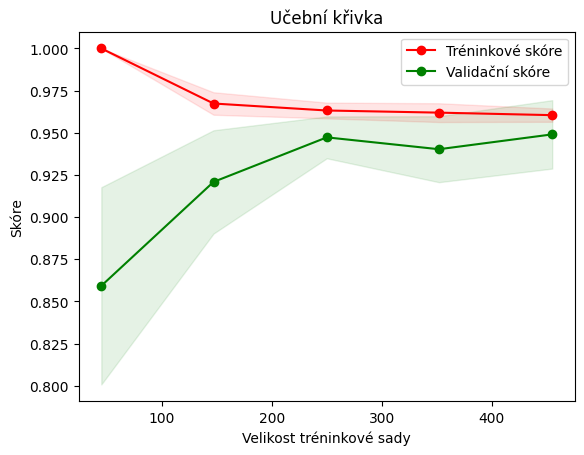

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Vytvoření učební křivky
train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Výpočet průměrného skóre a jeho rozptylu
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot učební křivky
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Tréninkové skóre")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validační skóre")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title('Učební křivka')
plt.xlabel('Velikost tréninkové sady')
plt.ylabel('Skóre')
plt.legend(loc="best")
plt.show()

## ULOŽENÍ MODELU
- používám pickle
- ukládá nejlepší parametry SVM
- model mohu kdykoliv vyvolat

In [55]:
import pickle

# Uložíme nejlepší model získaný pomocí GridSearchCV
with open('svm_best_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

print("Model jsem uložil s nejlepšími parametry 'svm_best_model.pkl'")

Model jsem uložil s nejlepšími parametry 'svm_best_model.pkl'


In [56]:
# Načtení uloženého modelu
with open('svm_best_model.pkl', 'rb') as file:
    svm_model_loaded = pickle.load(file)
    
# Použití načteného modelu pro predikce
y_pred_loaded = svm_model_loaded.predict(X_test)

# Vyhodnotíme přesnost načteného modelu
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Přesnost načteného modelu: {accuracy_loaded}")

Přesnost načteného modelu: 0.9824561403508771


In [57]:
#verze Joblib

import joblib

# Uložíme nejlepší model získaný pomocí GridSearchCV
joblib.dump(grid_search.best_estimator_, 'svm_nejlepsi_model.pkl')

print("Model uložen jako 'svm_nejlepsi_model.pkl'")

Model uložen jako 'svm_nejlepsi_model.pkl'


In [58]:
# Načteme uložený model
svm_model_loaded = joblib.load('svm_nejlepsi_model.pkl')

# Použití načteného modelu pro predikce
y_pred_loaded = svm_model_loaded.predict(X_test)

# Vyhodnotíme přesnost načteného modelu
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Přesnost načteného modelu: {accuracy_loaded}")

Přesnost načteného modelu: 0.9824561403508771


# SVM od Ladislava

In [65]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [66]:
print("Train accuracy score", accuracy_score(y_train, svm.predict(X_train)))
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print("Test accuracy score",svm_acc)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 0.9868131868131869
Test accuracy score 0.956140350877193
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Výsledok modelu SVM 0.956 na testovacích dátach bez optimalizácie.

## RANDOM FOREST zkouška

In [59]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model's accuracy and classification report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_rf)
print(classification_report_rf)

In [79]:
X = data_reduced.drop('diagnosis', axis=1)
y = data_reduced['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Rozdelili sme dáta na tréningovú a testovaciu množinu:
* Pomocou StandardScaler normalizujeme hodnoty tak, aby mali priemer 0 a rozptyl 1, čo zabezpečí, že všetky atribúty budú na rovnakej škále a model bude efektívnejší.
* fit_transform aplikuje škálovanie na tréningovú množinu, pričom transform aplikuje rovnaké škálovanie na testovaciu množinu bez opätovného "učenia".

# RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
print("Train accuracy score", accuracy_score(y_train, rfc.predict(X_train)))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))
print("Test accuracy score",rfc_acc)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 1.0
Test accuracy score 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Výsledok modelu RandomForest 0.964 na testovacích dátach bez optimalizácie.

# ADABOOST

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
ada.fit(X_train, y_train)
AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)
y_pred = ada.predict(X_test)

In [62]:
print("Train accuracy score", accuracy_score(y_train, ada.predict(X_train)))
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print("Test accuracy score",ada_acc)
y_pred = ada.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 1.0
Test accuracy score 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# MLP Classifier

In [67]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [68]:
print("Train accuracy score", accuracy_score(y_train, mlp.predict(X_train)))
mlp_acc = accuracy_score(y_test, mlp.predict(X_test))
print("Test accuracy score",mlp_acc)
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 0.9956043956043956
Test accuracy score 0.9649122807017544
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



- Výsledok modelu MLP Classifier 0.965 na testovacích dátach bez optimalizácie.

# Fine Tuning vybraných modelov

Pre Fine tuning som vybral 2 modely - Adaboost a MLP Classifier

# ADABOOST FINE TUNING

In [70]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [10, 30, 50, 75, 100, 200], 'learning_rate': [0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 3], 'algorithm': ['SAMME', 'SAMME.R']}

ada_ft = AdaBoostClassifier(random_state=42)

gs = GridSearchCV(ada_ft, parameters, cv=5, scoring='f1_weighted', verbose=0)
gs.fit(X_train, y_train)

c:\Users\lenov\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenov\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenov\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenov\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenov\venv\Lib\site-pac

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 3],
                         'n_estimators': [10, 30, 50, 75, 100, 200]},
             scoring='f1_weighted')

In [71]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}

In [72]:
print("Train accuracy score", accuracy_score(y_train, gs.predict(X_train)))
gs_acc = accuracy_score(y_test, gs.predict(X_test))
print("Test accuracy score",gs_acc)
y_pred = gs.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 1.0
Test accuracy score 0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Model Adaboost - použitý s kompletnými dátami bez redukcie.
- Accuracy na trainovacích dátach zostáva na 100%, pravdepodobne sa jedná o overfitting. 
- Accuracy na testoch sa na úrovni 0.973 - 0.965.

# MLP Fine Tuning

- Fine Tuning modelu s rôznymi parametrami

In [73]:
mlp_gs = MLPClassifier(max_iter=100)
parameters = {
    'hidden_layer_sizes': [(10,30,10),(20,),(30,10), (40,10), (40,20,10)],
    'activation': ['tanh', 'relu', 'sigmoid'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.005, 0.05],
    'learning_rate': ['constant']}

gs_mlp = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv=5)
gs_mlp.fit(X_train, y_train)

c:\Users\lenov\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenov\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenov\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\lenov\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\lenov\venv\Lib\site-packages\sklearn\utils\_param_va

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid'],
                         'alpha': [0.0001, 0.001, 0.005, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,), (30, 10),
                                                (40, 10), (40, 20, 10)],
                         'learning_rate': ['constant'],
                         'solver': ['sgd', 'adam']})

In [74]:
gs_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (30, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [75]:
print("Train accuracy score", accuracy_score(y_train, gs_mlp.predict(X_train)))
gs_mlp_acc = accuracy_score(y_test, gs_mlp.predict(X_test))
print("Test accuracy score",gs_mlp_acc)
y_pred = gs_mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train accuracy score 0.989010989010989
Test accuracy score 0.9912280701754386
[[71  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



- Najlepšia konfigurácia s Early Stopping

Train accuracy score 0.9604395604395605
Test accuracy score 0.9649122807017544
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



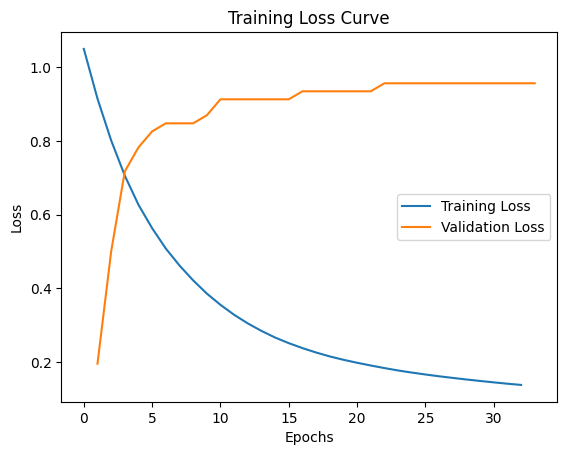

In [76]:
mlp_best = MLPClassifier(random_state=42, max_iter=500, activation= 'tanh', alpha= 0.005, hidden_layer_sizes= (40, 10), learning_rate= 'constant', solver= 'adam', early_stopping=True)
mlp_best.fit(X_train, y_train)

print("Train accuracy score", accuracy_score(y_train, mlp_best.predict(X_train)))
mlp_best_acc = accuracy_score(y_test, mlp_best.predict(X_test))
print("Test accuracy score",mlp_best_acc)
y_pred = mlp_best.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.plot(mlp_best.loss_curve_)
plt.plot(range(1, len(mlp_best.validation_scores_) + 1), mlp_best.validation_scores_)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

- Najlepšia konfigurácia bez Early Stopping

Train accuracy score 0.9846153846153847
Test accuracy score 0.9912280701754386
[[71  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



c:\Users\lenov\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


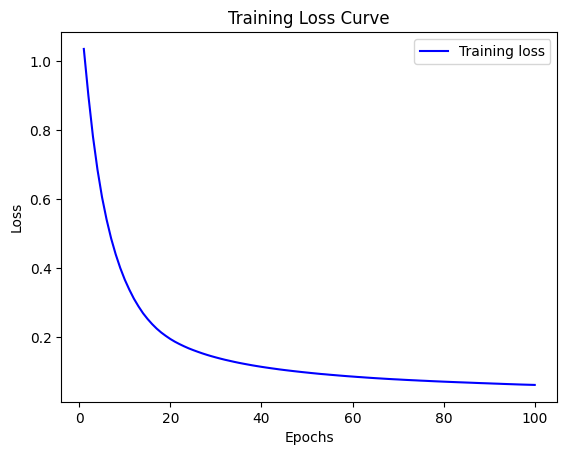

In [77]:
mlp_best3 = MLPClassifier(random_state=42, max_iter=100, activation= 'tanh', alpha= 0.005, hidden_layer_sizes= (40, 10), learning_rate= 'constant', solver= 'adam')
mlp_best3.fit(X_train, y_train)

print("Train accuracy score", accuracy_score(y_train, mlp_best3.predict(X_train)))
mlp_best3_acc = accuracy_score(y_test, mlp_best3.predict(X_test))
print("Test accuracy score",mlp_best3_acc)
y_pred = mlp_best3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

loss_values = mlp_best3.loss_curve_
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model MLP Classifier - použitý s kompletnými dátami bez redukcie.
- po skončení GridSearch najlepšía konfigurácia ďalej vyskúšaná s parametrom "Early Stopping" a bez...

- Pri použití Early Stopping výsledky sú: Train accuracy score 0.962, Test accuracy score 0.974. Výsledky sú podobné najlepším výsledkom z modelu Adaboost ale pravdepodobne bez overfittingu na train dátach.

- Bez Early Stopping výsledky sú: Train accuracy score 0.986, Test accuracy score 0.991. Je tam ale vysoké riziko overfittingu.

## LAZY PREDICT

In [60]:
pip install lazypredict

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.1/124.9 MB 5.3 MB/s eta 0:00:24
   - -------------------------------------- 3.1/124.9 MB 5.3 MB/s eta 0:00:24
   - -------------------------------------- 3.9/124.9 MB 4.8 MB/s eta 0:00:26
   - -------------------------------------- 4.5/124.9 MB 4.4 MB/s eta 0:00:28
   - -------------------------------------- 5.2/124.9 MB 4.1 MB/s eta 0:00:29
   - -------------------------------------- 5.8/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 6.3/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 6.6/124.9 MB 3.7 MB/s eta 0:00:33
   -- 

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

## MODEL č.1

* Jednoduchá neurónová sieť s jednou skrytou vrstvou a dropoutom.
* Optimalizátor Adam s adaptívnym učením.
* Normalizácia dát pomocou StandardScaler.
* Krížová validácia (KFold Cross-Validation), ktorá zabezpečila robustnejšie hodnotenie výkonnosti modelu na rôznych podmnožinách dát.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

In [ ]:
from keras.optimizers import Adam
from sklearn.model_selection import KFold

def create_model():
    model = Sequential()
    model.add(Input(shape=(22,)))
    model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

X = data_reduced.iloc[:, 1:]  
y = data_reduced.iloc[:, 0]    

scaler = StandardScaler()
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
losses = []

for train_index, val_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    classifier = create_model()

    classifier.fit(X_train, y_train, batch_size=100, epochs=150, verbose=0)

    score = classifier.evaluate(X_val, y_val, verbose=0)
    accuracies.append(score[1])
    losses.append(score[0])

mean_accuracy1 = np.mean(accuracies)
mean_loss1 = np.mean(losses)

print(f'Priemerná presnosť: {mean_accuracy1}')
print(f'Priemerná strata: {mean_loss1}')

## MODEL č.2

# úprava modelu:
* Zložitejšia architektúra s dvoma vrstvami, kde prvá vrstva má 32 neurónov a druhá vrstva 16 neurónov.
* Použitie Dropoutu s hodnotou 0.2, aby sa znížilo pretrénovanie.
* Optimalizátor Adam s adaptívnym učením.
* Krížová validácia (KFold Cross-Validation) s 5 foldmi, aby sme zabezpečili robustné hodnotenie výkonnosti modelu na rôznych podmnožinách dát.

In [ ]:
X = data_reduced.iloc[:, 1:]  
y = data_reduced.iloc[:, 0]   

scaler = StandardScaler()
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
losses = []

for train_index, val_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    classifier = Sequential()
    classifier.add(Input(shape=(22,)))  
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.2))  
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  

    classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    classifier.fit(X_train, y_train, batch_size=100, epochs=150, verbose=0)

    score = classifier.evaluate(X_val, y_val, verbose=0)

    accuracies.append(score[1])
    losses.append(score[0])

mean_accuracy2 = np.mean(accuracies)
mean_loss2 = np.mean(losses)

print(f'Priemerná presnosť: {mean_accuracy2}')
print(f'Priemerná strata: {mean_loss2}')


Zmeny spolu viedli k zvýšeniu presnosti modelu, keďže priemerná presnosť sa zvýšila na 93 % a model robí menšie chyby (nižšia strata). Viac vrstiev, dropout a krížová validácia pomohli modelu lepšie sa prispôsobiť dátam a znížiť pretrénovanie.

## MODEL č.3

* # úprava modelu:
* Zložitejšia architektúra modelu: Dve skryté vrstvy s väčším počtom neurónov (64 a 32), ktoré lepšie zachytávajú komplexné vzory v dátach.
* Použitie PCA (Principal Component Analysis):PCA na zníženie dimenzionality na 10 hlavných komponentov, čo zlepšuje efektivitu a znižuje šum.
* Dropout s vyššou hodnotou (0.3): Použitie Dropoutu na oboch skrytých vrstvách pomáha znížiť riziko pretrénovania.
* Early Stopping: Early Stopping zabezpečuje, že tréning sa zastaví, keď sa model prestane zlepšovať, čím sa predchádza zbytočnému trénovaniu a riziku pretrénovania.
* Krížová validácia (KFold Cross-Validation):Krížová validácia so shuffle poskytuje stabilné vyhodnotenie modelu na rôznych podmnožinách dát, čím sa zabezpečí lepšia generalizácia.

In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
y = data_reduced.iloc[:, 0]         

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
losses = []

for train_index, val_index in kfold.split(X_scaled, y):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    pca = PCA(n_components=10)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)

    classifier = Sequential()
    classifier.add(Input(shape=(10,))) 
    classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.3))
    classifier.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dropout(rate=0.3))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    classifier.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    classifier.fit(X_train, y_train, batch_size=100, epochs=150, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    score = classifier.evaluate(X_val, y_val, verbose=0)
    accuracies.append(score[1]) 
    losses.append(score[0])      

mean_accuracy3 = np.mean(accuracies)
mean_loss3 = np.mean(losses)

print(f'Priemerná presnosť pre model č. 3: {mean_accuracy3}')
print(f'Priemerná strata pre model č. 3: {mean_loss3}')


# Zhrnutie:

* Model č. 1: Je najjednoduchší a dosiahol najnižšiu presnosť (90.51 %) a najvyššiu stratu (0.4170). Má iba jednu skrytú vrstvu a menší dropout. Zlepšenie by mohlo zahŕňať pridaním ďalšej vrstvy a zvýšením Dropoutu.

* Model č. 2: Má dve skryté vrstvy, väčší počet neurónov a vyšší Dropout (0.2), čo vedie k lepším výsledkom ako model č. 1 (93.85 % presnosť). Model má však stále potenciál na zlepšenie, najmä pridaním techník ako Early Stopping a PCA.

* Model č. 3: Tento model dosiahol najlepšiu presnosť (96.31 %) a najnižšiu stratu (0.1526) vďaka pridaniu PCA a Early Stopping. Kombinácia väčšieho počtu neurónov, vyššieho Dropoutu, redukcie dimenzionality a zastavenia tréningu pri poklese zlepšenia priniesla výrazné zlepšenie.

* Model č. 3 je preto najefektívnejší z hľadiska generalizácie, schopnosti zachytiť vzory v dátach a zníženia pretrénovania.


In [ ]:
models = ['Model č. 1', 'Model č. 2', 'Model č. 3']

accuracy = [mean_accuracy1, mean_accuracy2, mean_accuracy3]
loss = [mean_loss1, mean_loss2, mean_loss3]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(models, accuracy, color='lightblue')
plt.ylim(0.8, 1.0)
plt.title('Porovnanie presnosti modelov')
plt.xlabel('Modely')
plt.ylabel('Priemerná presnosť')

plt.subplot(1, 2, 2)
plt.bar(models, loss, color='salmon')
plt.ylim(0, 0.5)
plt.title('Porovnanie straty modelov')
plt.xlabel('Modely')
plt.ylabel('Priemerná strata')

plt.tight_layout()
plt.show()
